# 目标
1. 预测客户是否会继续使用该服务或者离开该服务
2. 了解客户行为：
    1）是什么让用户使用服务
    2）是什么让客户离开服务
    
# 公司目标
 1. 尽可能的获取新客户
 2. 尽可能得留住现有客户(获得新客户往往比保留现有客户更困难，也更加昂贵，在《哈佛商业评论》中表明获得一个新客户的成本是现有客户的5-25倍)

In [118]:
import pandas as pd

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 数据集来自一个虚构的电信公司的客户信息，该公司提供各种服务，如流媒体、电话、互联网服务
#### 目标变量：
Churn——客户流失状态（0/1）
#### 人口统计信息
gender——顾客是男性还是女性  
SeniorCitizen——客户是否是老年人  
Partner——客户是否有合作伙伴  
Dependents——客户是否有依赖项  
#### Customer account information
tenure——客户使用该服务的月数  
Contract——客户的合同期限  
PaperlessBilling -客户是否有无纸化的账单  
PaymentMethod——客户的付款方式  
MonthlyCharges——每月向客户收取的金额  
TotalCharges-向客户收取的总金额  
#### Services that each customer has signed up for（每个客户已经签约的服务）
PhoneService - 客户是否有电话服务  
MultipleLines - 客户是否有多条线路  
InternetService - 客户的互联网服务供应商  
OnlineSecurity - 客户是否有在线安全  
OnlineBackup - 客户是否存在在线备份  
DeviceProtection - 客户是否有设备保护  
TechSupport - 客户是否有技术支持  
StreamingTV - 客户是否有流媒体电视  
StreamingMovies - 客户是否有流媒体电影  


## 数据预处理
### 1. 重复值（Duplicate Values）

In [119]:
# 1）检查是否有重复值
data.duplicated().sum()

0

In [120]:
# 2）customerID不是必要的，删除
data.drop('customerID', axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. 重命名列名

In [121]:
# CamelCase格式变换成snakecase格式
columns_list = data.columns
snake_case_columns = [inflection.underscore(name) for name in columns_list]
data.columns = snake_case_columns
data.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3. 数据类型

In [122]:
# 生成数据类型（分类变量和连续变量）
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

data_type_general = dict()
for col in data.columns:
    if col in column_numerical:
        data_type_general[col] = 'numerical'
    else:
        data_type_general[col] = 'catagorical'
tmp = pd.Series(data_type_general)
tmp

gender               catagorical
senior_citizen       catagorical
partner              catagorical
dependents           catagorical
tenure                 numerical
phone_service        catagorical
multiple_lines       catagorical
internet_service     catagorical
online_security      catagorical
online_backup        catagorical
device_protection    catagorical
tech_support         catagorical
streaming_tv         catagorical
streaming_movies     catagorical
contract             catagorical
paperless_billing    catagorical
payment_method       catagorical
monthly_charges        numerical
total_charges          numerical
churn                catagorical
dtype: object

In [123]:
data_type_general = pd.DataFrame(tmp).T.rename({0:'data_type_general'})
data_type_general

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
data_type_general,catagorical,catagorical,catagorical,catagorical,numerical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,numerical,numerical,catagorical


In [124]:
# python数据类型
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'data_type_python'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
data_type_python,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object


In [125]:
data.loc[data['tenure']==0, ['tenure', 'total_charges', 'churn']]

,tenure,total_charges,churn
488,0,,No
753,0,,No
936,0,,No
1082,0,,No
1340,0,,No
3331,0,,No
3826,0,,No
4380,0,,No
5218,0,,No
6670,0,,No


In [126]:
data['total_charges'].isna().sum()

0

In [127]:
# 将total_charges转为numerical
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
data['total_charges'].isna().sum()

11

In [128]:
# 5）填充空值
data['total_charges'].fillna(0, inplace=True)
data['total_charges'].isna().sum()

0

In [129]:
# 6）修改数据类型
data['total_charges'] = data['total_charges'].astype(float)
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'data_type_python'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
data_type_python,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object


### 4. 缺失值

In [130]:
# 7)查看是否还有空值
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})
data_null_total

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
total_null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
# 8)查看空值比率
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})
data_null_percentage

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
percentage_null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. 数据范围

In [132]:
# 9) 看到数据变化范围：
# 数据的范围，用于数值数据
# 类别变化，用于分类数据
variation_numerical = dict()
for col in column_numerical:
    tem = f'{data[col].min()}-{data[col].max()}'
    variation_numerical[col] = tem
data_variation_numerical = pd.DataFrame(pd.Series(variation_numerical)).T.rename({0:'data_variation'})
data_variation_numerical

,tenure,monthly_charges,total_charges
data_variation,0-72,18.25-118.75,0.0-8684.8


In [133]:
# 分类变量范围
variation_categorical = dict()
for col in column_categorical:
    tem = data[col].unique().tolist()
    tem.sort()
    variation_categorical[col] = ', '.join(str(item) for item in tem)
data_variation_categorical = pd.DataFrame(pd.Series(variation_categorical)).T.rename({0:'data_variation'})
data_variation_categorical

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data_variation,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...","No, Yes"


In [134]:
# 将分类和连续变量范围拼接起来
data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data_variation,0-72,18.25-118.75,0.0-8684.8,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...","No, Yes"


In [139]:
pd.concat([data_variation_numerical.rename({'data_variation':'range'}), data_variation_categorical.rename({'data_variation':'variation'})], axis=0).fillna('-').reindex(data.columns, axis=1).T

,range,data variation
gender,-,"Female, Male"
senior_citizen,-,"No, Yes"
partner,-,"No, Yes"
dependents,-,"No, Yes"
tenure,0-72,-
phone_service,-,"No, Yes"
multiple_lines,-,"No, Yes"
internet_service,-,"DSL, Fiber optic, No"
online_security,-,"No, Yes"
online_backup,-,"No, Yes"


### 6. 冗余值 
multiple_lines属性，它有一个无电话服务类别。这是一个冗余类别，因为如果客户没有电话服务(phone_service = No)，那么他们就不能有多线服务，这需要电话服务。这也适用于online_security、online_backup、device_protection、tech_support、streaming_tv和streaming_movies属性。这些服务需要互联网服务。我的**解决方案是简单地将这些类别替换为No**。此解决方案还用于避免**多重共线性和减少数据集维数（独热编码）**。

In [136]:
# 替换冗余值
data.replace({'No phone service':'No',
            'No internet service':'No'},
            inplace=True)

data['senior_citizen'].replace({0:'No',
                                1:'Yes'},
                                inplace=True)

In [143]:
variation_categorical = dict()

for col in column_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data_variation'})

data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data_variation,0-72,18.25-118.75,0.0-8684.8,"Female, Male","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...","No, Yes"


In [144]:
pd.concat([data_variation_numerical.rename({'data variation':'range'}), data_variation_categorical.rename({'data variation':'variation'})], axis=0).fillna('-').reindex(data.columns, axis=1).T

,data_variation,data_variation
gender,-,"Female, Male"
senior_citizen,-,"No, Yes"
partner,-,"No, Yes"
dependents,-,"No, Yes"
tenure,0-72,-
phone_service,-,"No, Yes"
multiple_lines,-,"No, Yes"
internet_service,-,"DSL, Fiber optic, No"
online_security,-,"No, Yes"
online_backup,-,"No, Yes"


### 7. 数据集信息汇总

In [145]:
data_info = pd.concat([data_type_general, data_type_python,
                       data_null_total,
                       data_null_percentage.round(2), data_variation],
                      axis=0)

data_info = data_info.reindex(data.columns, axis=1)
data_info

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
data_type_general,catagorical,catagorical,catagorical,catagorical,numerical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,catagorical,numerical,numerical,catagorical
data_type_python,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
total_null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage_null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data_variation,"Female, Male","No, Yes","No, Yes","No, Yes",0-72,"No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...",18.25-118.75,0.0-8684.8,"No, Yes"


# 探索性数据分析

In [146]:
# 连续变量
column_numerical = ['tenure','monthly_charges','total_charges']

column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')
column_categorical.remove('churn')    # 只包含输入特征

In [147]:
data_viz = data.copy()
data_viz.loc[:, 'churn'] = data_viz.loc[:, 'churn'].apply(lambda x: 'churn' if x=='Yes' else 'retain')

## 目标分布

<function matplotlib.pyplot.show(close=None, block=None)>

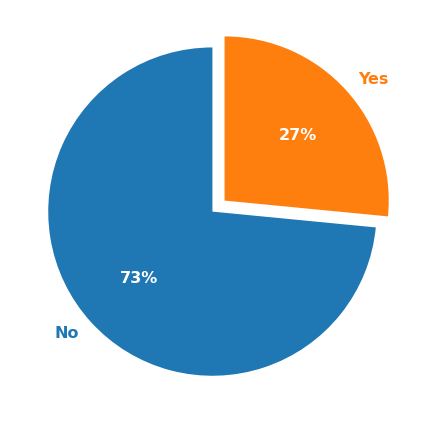

In [167]:
# 查看流失和留存用户的比例
import matplotlib.pyplot as plt
pie_data = data['churn'].value_counts(normalize=True).values*100
pie_label = data['churn'].value_counts(normalize=True).index.tolist()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
    texts[i].set_color(wedge.get_facecolor())
plt.tight_layout()
plt.show

#### 我们可以看到，27%的客户离开了服务。从技术上讲，这个数据集是一个不平衡的数据集。
#### 我们需要探究一下为什么会发生这种情况，有很多因素，但不是所有的属性都与客户的流失状态有很强的关系。

In [176]:
# 可视化函数
import seaborn as sns
def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['retain', 'churn'], axis=1)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    crosstab = crosstab.sort_values('churn', ascending=False)
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(x=i,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    crosstab = crosstab.sort_values('churn', ascending=True)
    crosstab.plot(kind='barh', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(y=i,
                  x=(x_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  x_titleize = inflection.titleize(x)
  ax.set_title(f'Customer Churn Probability by {x_titleize}')      
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

In [186]:
crosstab = pd.crosstab(index=data_viz['gender'], columns=data_viz['churn'],normalize='index')
crosstab = crosstab.reindex(['retain', 'churn'], axis=1)
crosstab

churn,retain,churn
gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603


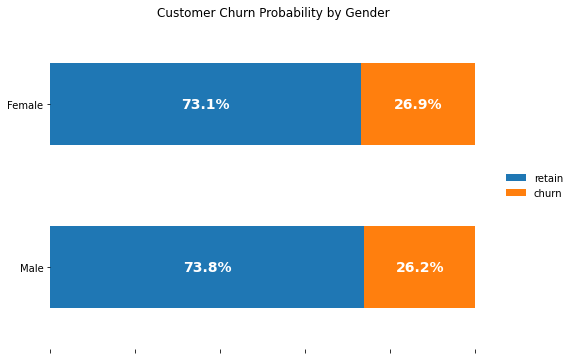

In [177]:
fig, ax = plt.subplots(figsize=(8,6))
stacked_bar_plot(data=data_viz, x='gender', y='churn',ax=ax)

#### 男性和女性的流失概率几乎相同。我们可以说客户的性别与他们的客户流失状况无关。

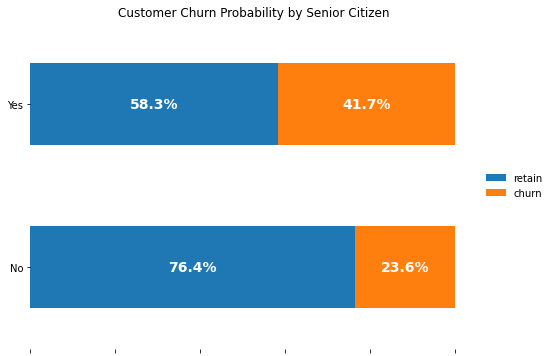

In [191]:
fig, ax = plt.subplots(figsize=(8,6))
stacked_bar_plot(data=data_viz, x='senior_citizen', y='churn',ax=ax)

### 老年人的流失率高于年轻人，我们可以说这个属性与流失状态有关

### 流失概率

In [215]:
columns = data_viz['churn']

attr_crosstab = pd.DataFrame()

for col in column_categorical:
  # create crosstab for each attribute
  index = data_viz[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('churn', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()

,attribute,churn,retain
0,Payment Method (Electronic check),0.452854,0.547146
1,Contract (Month-to-month),0.427097,0.572903
2,Internet Service (Fiber optic),0.418928,0.581072
3,Senior Citizen (Yes),0.416813,0.583187
4,Paperless Billing (Yes),0.335651,0.664349
5,Partner (No),0.329580,0.670420
6,Online Security (No),0.313296,0.686704
7,Dependents (No),0.312791,0.687209
8,Tech Support (No),0.311862,0.688138
9,Streaming Tv (Yes),0.300702,0.699298


### 前 5 名流失概率

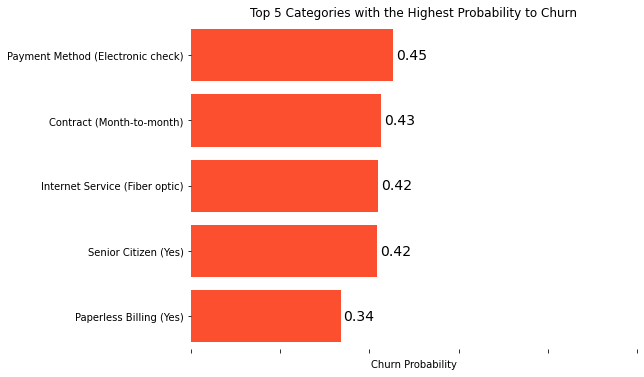

In [217]:
fig,ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[:5], x='churn', y='attribute', ax=ax, 
            palette=['#FC4F30'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Highest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

### 前 5 名留存概率

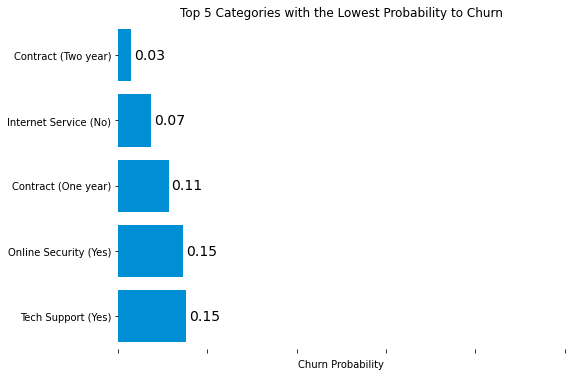

In [218]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[-5:].sort_values('churn'), 
            x='churn', y='attribute', ax=ax, palette=['#008FD5'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Lowest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

## 接下来看连续变量的影响

### 按tenure划分的流失概率

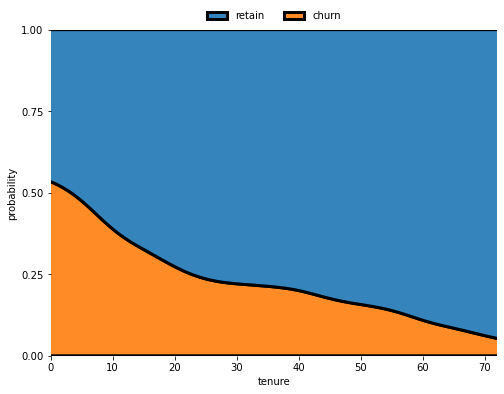

In [233]:
import numpy as np
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=data_viz, x='tenure', hue='churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,data_viz['tenure'].max(),10))
ax.set_xlim(data_viz['tenure'].min(),data_viz['tenure'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')

sns.despine(left=True, bottom=True)

# ax.axis('tight')
plt.show()

#### 我们可以从图中看出有明显的趋势，可以说，tenure与客户流失率概率呈现负相关，tenure较小时对应了较高的用户流失率，应该是新用户在尝试这些服务，然后再考虑是否继续使用这些服务了

### tenure与contract type的关系

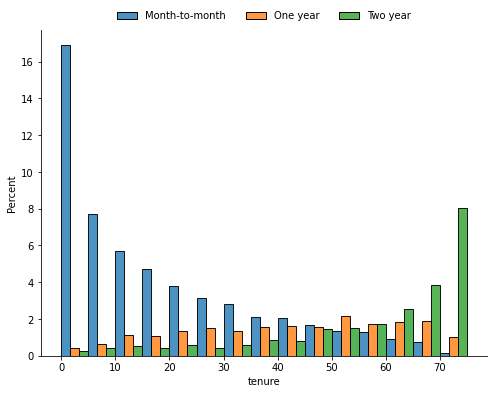

In [234]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=data_viz, x='tenure', hue='contract', stat='percent', 
             multiple='dodge', ax=ax, binwidth=5, alpha=0.8)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', 
                frameon=False)

sns.despine()  
plt.show()

#### 从流失概率中，按月合约的流失率相当高（第二），我试图用这个图从合约类型来分析tenure分布，可以看出，签订按月合约的用户大多tenure较短，大约有25%的客户是签订的按月合约，而且期限不到5个月。
#### 可以获得两个新假设：
### 短暂的tenure意味着客户对服务仍然是新手；新客户倾向于签订最短的合约（按月合约） 
#### 就像品尝新事物，我们会先试一勺，而不是马上拿一碗，如果味道好就会多吃点，如果味道不好，肯定就不会再吃了。

### 按monthly charges 划分的流失率

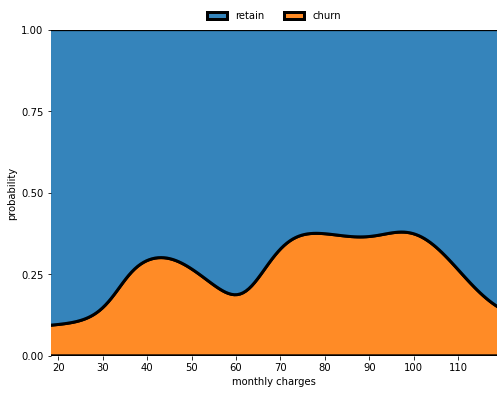

In [235]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=data_viz, x='monthly_charges', hue='churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,data_viz['monthly_charges'].max(),10))
ax.set_xlim(data_viz['monthly_charges'].min(),data_viz['monthly_charges'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')
ax.set_xlabel('monthly charges')

sns.despine(left=True, bottom=True)

# ax.axis('tight')
plt.show()

#### 从图中可以看出，没有明显的趋势。当费用在60时流失率下降后又上升，当月收费超过100时又下降，可以说是收费较高时客户得到一个值得的服务，让客户觉得这个钱花的值。
#### 即便如此，我们也可以建议业务团队将某些特定市场的流失率降低，比如通过向月费高的客户添加某些特权。

### 数值数据分布

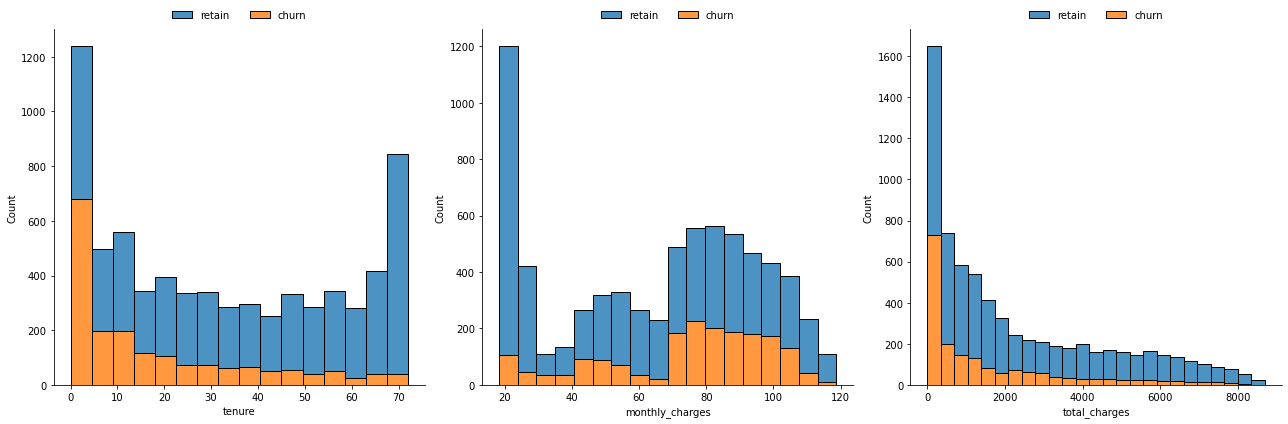

In [236]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_viz, x=col, hue='churn', multiple='stack', ax=ax[i], alpha=0.8)
  sns.move_legend(ax[i], "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

plt.tight_layout()
sns.despine()
plt.show()

#### 我们可以看到，数值数据分布不是正态分布。

### 客户流失状态的属性关联

#### 接下来我们将计算属性与目标值之间的关联来探究这个属性是否与用户流失状态是否有很强的关系。从技术上讲，关联是指两个变量之间的任何关系，而相关通常只指两个变量之间的线性关系。
#### 数值与数值属性，使用：皮尔逊系数，斯皮尔曼系数，肯德尔系数
#### 分类与分类属性，使用：克莱默系数，泰尔系数
#### 数值与分类属性，使用：相关比率

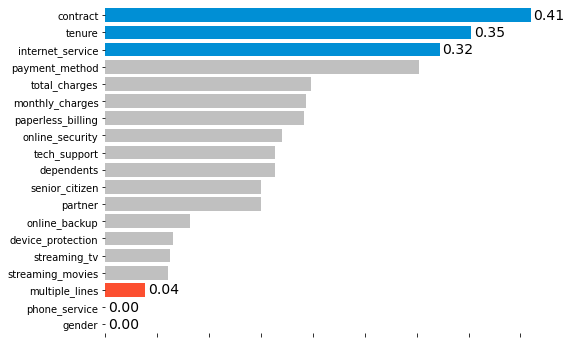

In [251]:
from dython.nominal import associations
# 计算特征之间的关联
associations_out = associations(data_viz,
                               nominal_columns=column_categorical,
                               numerical_columns=column_numerical,
                               nom_nom_assoc='cramer',
                               compute_only=True)
# 输出为字典类型{'ax','corr'}
corr_all = associations_out['corr']  
corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)
1
# 自定义前三名的调色板
threshold_top = 3
threshold_bot = corr_target.size - 3 - 1
palette = []
for i in range(0, len(corr_target)):
    if i < threshold_top:
        palette.append('#008FD5')  # 蓝色
    elif i > threshold_bot:
        palette.append('#FC4F30')  # 红色
    else:
        palette.append('silver')
        
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x=corr_target.values, 
            y=corr_target.index, ax=ax, palette=palette, saturation=1)

# 自定义y轴
for con in ax.containers:
    labels = con.datavalues
    labels_len = len(labels)
    
    # 屏蔽前3个和后3个
    np.put(labels, np.arange(3,labels_len-3), [-1])
    
    # 隐藏非前3和后3的标签
    labels = [f'{val:.2f}' if val !=-1 else '' for val in labels]
    
    ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')
    
    ax.set_xticklabels([])
    sns.despine(left=True, bottom=True)
    plt.show()

#### 从图中我们可以看出每个属性与客户流失状态的关联，无论是留存还是流失。contract（合同类型)、tenure（客户使用期限月数）、internetservice是与客户流失率关系最强的三个属性。同时gender、phoneservice、multiplelines是与流失率最弱的3个属性。
#### 但是，相关性并不代表因果关系，这里只是想弄清楚属性与目标变量之间的关系，而不是因果关系。

# 数据预处理

In [259]:
# 1)划分训练集和测试机7：3
from sklearn.model_selection import train_test_split
data_X = data.drop('churn', axis=1)
data_y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)
print('X shape\t\t:', data_X.shape)
print('y shape\t\t:', data_y.shape)
print('X_train shape\t:', X_train.shape)
print('y_train shape\t:', y_train.shape)
print('X_test shape\t:', X_test.shape)
print('y_test shape\t:', y_test.shape)

X shape		: (7043, 19)
y shape		: (7043,)
X_train shape	: (4930, 19)
y_train shape	: (4930,)
X_test shape	: (2113, 19)
y_test shape	: (2113,)


In [266]:
# 2) Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)
print(y_train[:5].values)
print(y_train_encode[:5])

['No' 'Yes' 'No' 'Yes' 'No']
[0 1 0 1 0]


#### 保留客户 (churn = No) 将被编码为 0，而流失的客户 (churn = Yes) 将被编码为 1。

### 对输入特征进行onehot编码，如果一个特征只有两个类别，就去掉一个类别来避免多重共线性和冗余列。多重共线性是一个一些独立变量之间高度相关的情况，当两个独立变量的相关系数是+1.0或者-1.0时，就会出现完全相关。变量之间的完全相关会导致奇点。
### 最简单的解决办法是在进行onehot编码时删除一列，还可以只在特征具有二进制类别时删除一列。


In [269]:
# 3) One-hot Encoding
from sklearn.preprocessing import OneHotEncoder
# 如果特征只有 2 个类别，则删除 1 个类别？？？？？
ohe = OneHotEncoder(sparse=False, drop='if_binary')
ohe.fit(X_train[column_categorical])
X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])
X_train_ohe

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [273]:
column_ohe = ohe.get_feature_names_out()

# 重命名为snake_case
for i ,col in enumerate(column_ohe):
    column_ohe[i] = inflection.underscore(column_ohe[i]).replace(' ','_').replace('_(automatic)','')
column_ohe

array(['gender_male', 'senior_citizen_yes', 'partner_yes',
       'dependents_yes', 'phone_service_yes', 'multiple_lines_yes',
       'internet_service_dsl', 'internet_service_fiber_optic',
       'internet_service_no', 'online_security_yes', 'online_backup_yes',
       'device_protection_yes', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'contract_month_to_month',
       'contract_one_year', 'contract_two_year', 'paperless_billing_yes',
       'payment_method_bank_transfer', 'payment_method_credit_card',
       'payment_method_electronic_check', 'payment_method_mailed_check'],
      dtype=object)

In [274]:
X_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
6427,Male,No,No,No,41,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.15,802.35
6971,Female,Yes,Yes,No,18,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),99.75,1836.25
96,Male,No,Yes,Yes,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.70
5640,Male,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,79.60,79.60
414,Female,Yes,Yes,No,48,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.65,3545.05


In [288]:
# 训练集
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)
# 组合分类编码特征和数值型特征
X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df],axis=1)
X_train_encode.head()

# 测试集
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)
X_train_encode.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_tv_yes,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
6427,41,20.15,802.35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6971,18,99.75,1836.25,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
96,71,66.85,4748.70,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5640,1,79.60,79.60,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
414,48,70.65,3545.05,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [289]:
# Min_Max标准化
from sklearn.preprocessing import MinMaxScaler
X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

for i in column_numerical:
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])
X_train_scale.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_tv_yes,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
6427,0.569444,0.017439,0.092386,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6971,0.250000,0.810663,0.211433,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
96,0.986111,0.482810,0.546783,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5640,0.013889,0.609865,0.009165,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
414,0.666667,0.520678,0.408190,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [285]:
# combine the X-train and X-test
data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)

# combine with the y-train
data_scale = data_scale.join(pd.Series(y_train_encode, name='churn', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_scale = data_scale.join(pd.Series(y_test_encode, name='churn', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_scale['churn_1'].fillna(data_scale['churn_2'], inplace=True)
data_scale.drop(columns='churn_2', inplace=True)
data_scale.rename(columns={'churn_1':'churn'}, inplace=True)
data_scale.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check,churn
6427,0.569444,0.017439,0.092386,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6971,0.250000,0.810663,0.211433,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96,0.986111,0.482810,0.546783,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5640,0.013889,0.609865,0.009165,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
414,0.666667,0.520678,0.408190,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [290]:
# 训练集
data_scale_train = pd.concat([X_train_scale, pd.Series(y_train_encode, name='churn', index=X_train_scale.index)], axis=1)
data_scale_train.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check,churn
6427,0.569444,0.017439,0.092386,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
6971,0.250000,0.810663,0.211433,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
96,0.986111,0.482810,0.546783,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
5640,0.013889,0.609865,0.009165,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
414,0.666667,0.520678,0.408190,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0


In [293]:
X_train_scale.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_tv_yes,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
6427,0.569444,0.017439,0.092386,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6971,0.250000,0.810663,0.211433,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
96,0.986111,0.482810,0.546783,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5640,0.013889,0.609865,0.009165,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
414,0.666667,0.520678,0.408190,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [294]:
y_train_encode

array([0, 1, 0, ..., 0, 1, 0])

In [303]:
# 过采样和SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scale, y_train_encode)
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['churn'])
data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)
data_smote

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check,churn
0,0.569444,0.017439,0.092386,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,0.250000,0.810663,0.211433,0.0,1.0,1.0,0.000000,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.986111,0.482810,0.546783,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
3,0.013889,0.609865,0.009165,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.666667,0.520678,0.408190,0.0,1.0,1.0,0.000000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,0.373289,0.612276,0.250235,1.0,0.0,0.0,0.969201,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
7240,0.013889,0.516384,0.008085,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
7241,0.013889,0.513294,0.008050,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
7242,0.260864,0.668163,0.181239,1.0,1.0,1.0,0.000000,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [304]:
data_scale_train['churn'].value_counts()

0    3622
1    1308
Name: churn, dtype: int64

In [305]:
data_smote['churn'].value_counts()

0    3622
1    3622
Name: churn, dtype: int64

#### 现在，保留 (0) 和流失 (1) 类别具有相同的数量

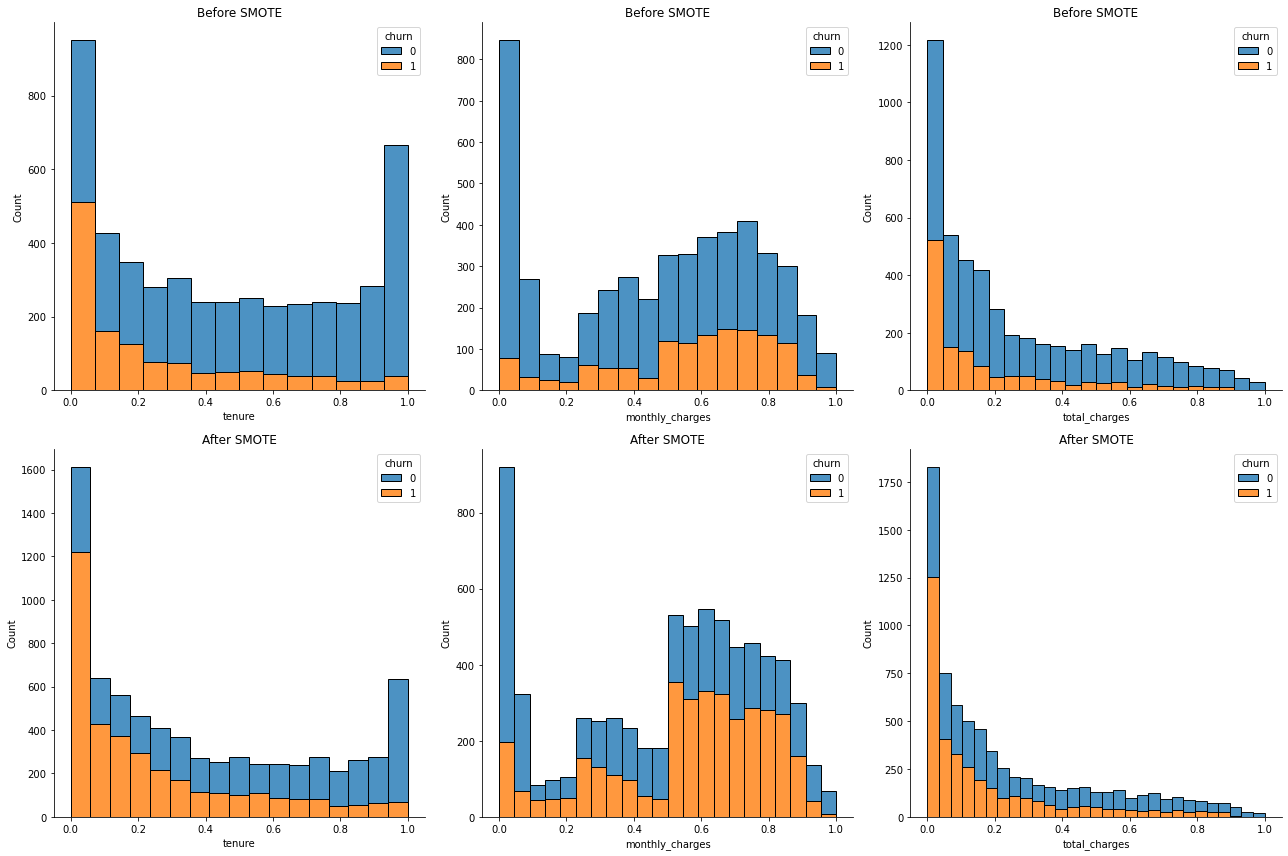

In [306]:
fig, ax = plt.subplots(2, 3, figsize=(18,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_scale_train, x=col, hue='churn', multiple='stack', ax=axes_list[i], alpha=0.8)
  axes_list[i].set_title('Before SMOTE')

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_smote, x=col, hue='churn', multiple='stack', ax=axes_list[i+3], alpha=0.8)
  axes_list[i+3].set_title('After SMOTE')

plt.tight_layout()
sns.despine()

plt.show()

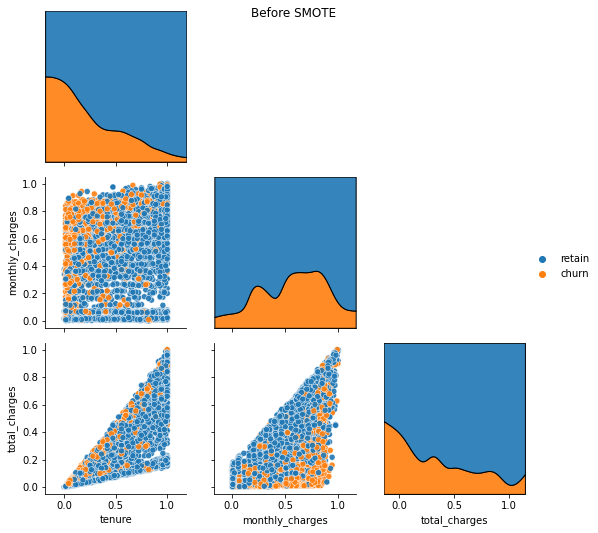

In [307]:
tmp_df = data_scale_train.copy()
tmp_df.loc[:,'churn'] = tmp_df.loc[:,'churn'].apply(lambda x: 'churn' if x == 1 else 'retain')

g = sns.PairGrid(tmp_df, x_vars=column_numerical, y_vars=column_numerical, hue='churn', corner=True)
g.map_lower(sns.scatterplot, alpha=0.9)
g.map_diag(sns.kdeplot, multiple='fill', alpha=0.9)
g.add_legend(title='')

g.fig.suptitle('Before SMOTE')

plt.show()

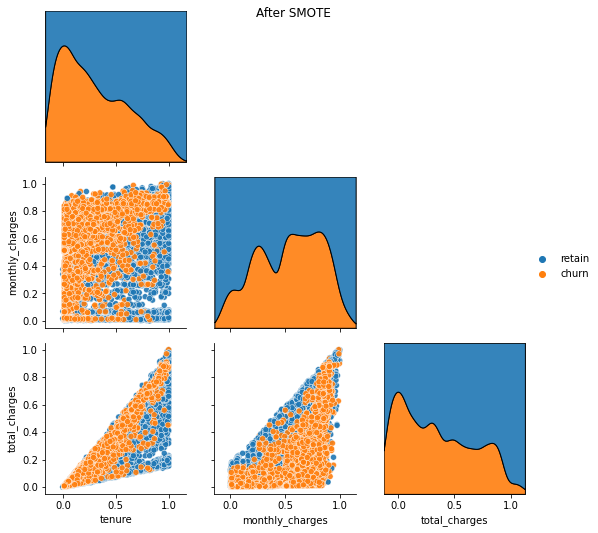

In [308]:
tmp_df = data_smote.copy()
tmp_df.loc[:,'churn'] = tmp_df.loc[:,'churn'].apply(lambda x: 'churn' if x == 1 else 'retain')

g = sns.PairGrid(tmp_df, x_vars=column_numerical, y_vars=column_numerical, hue='churn', corner=True)
g.map_lower(sns.scatterplot, alpha=0.9)
g.map_diag(sns.kdeplot, multiple='fill', alpha=0.9)
g.add_legend(title='')

g.fig.suptitle('After SMOTE')

plt.show()

# 模型开发与评估

In [309]:
# score函数
def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

In [310]:
# 调和平均数（准确率和召回率之间的调和平均值）
def fbeta_score(accuracy, recall, beta=1):
  fbeta_score = (1 + beta**2) * (accuracy*recall)/(beta*accuracy+recall)
  
  return fbeta_score

In [313]:
# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=1),
    'Ridge Classifier':RidgeClassifier(random_state=1),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=1),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=1),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

In [316]:
# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = get_score(y_pred_list, y_test_model, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.746805,0.707463,0.754797,0.714375,0.754797
Ridge Classifier,0.744439,0.707253,0.756032,0.713237,0.756032
KNN,0.696167,0.659923,0.698699,0.660949,0.698699
SVC,0.765263,0.713257,0.747443,0.723523,0.747443
Neural Network,0.751538,0.685759,0.695987,0.690234,0.695987
Decision Tree,0.731188,0.665813,0.681564,0.671773,0.681564
Random Forest,0.771415,0.708293,0.714070,0.711016,0.714070
Gradient Boosting Classifier,0.787506,0.733903,0.762585,0.744368,0.762585
AdaBoost Classifier,0.754851,0.711524,0.756290,0.720263,0.756290


### 总体而言，boosting 方法表现出良好的性能。所以，我只会在下一个过程中使用boosting方法。

In [317]:
model_list = {
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = get_score(y_pred_list, y_test_model, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.787506,0.733903,0.762585,0.744368,0.762585
AdaBoost Classifier,0.754851,0.711524,0.756290,0.720263,0.756290
CatBoost Classifier,0.785613,0.725496,0.728288,0.726858,0.728288
Hist Gradient Boosting,0.780407,0.719027,0.722468,0.720694,0.722468
XGBoost,0.784193,0.723278,0.722769,0.723022,0.722769
LightGBM,0.783247,0.722687,0.726677,0.724612,0.726677


# 是否可以改进效果？

### 特征选择

In [318]:
# 单变量过滤
# 使用 ANOVA 进行特征选择
# model evaluation & tuning hyperparameter

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif


threshold = 13

filter = SelectKBest(score_func=f_classif, k=threshold)
filter.fit(X_train_model, y_train_model)

X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_model)

print('before filter\t:', X_train_model.shape)
print('after filter\t:', X_train_filter.shape)

before filter	: (7244, 26)
after filter	: (7244, 13)


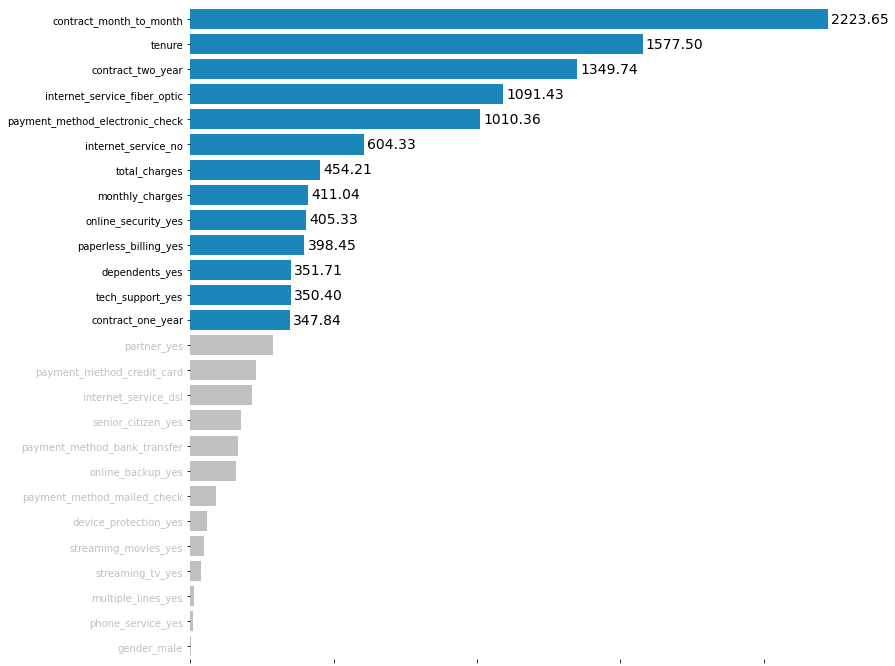

In [319]:
# 可视化
selected_feature = filter.get_feature_names_out()
feature_name = filter.feature_names_in_
feature_score = filter.scores_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_score':feature_score}).sort_values('feature_score', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
selected = list()
for i in range(0, X_train_model.shape[1]):
  if i < threshold:
    selected.append(True)
  else:
    selected.append(False)

selected_s = pd.Series(selected, name='selected')
feature_selection = pd.concat([feature_selection, selected_s], axis=1)

# highlight the top features
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(data=feature_selection, x='feature_score', y='feature_name', ax=ax, palette=palette)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top features
  np.put(labels, np.arange(threshold,labels_len), [-1])

  # hide the labels for non-top features
  labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.show()

In [320]:
# 观察特征过滤后的效果
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_filter = get_score(y_pred_list, y_test_model, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.772362,0.721410,0.757397,0.732232,0.757397
AdaBoost Classifier,0.755324,0.714647,0.762303,0.722778,0.762303
CatBoost Classifier,0.788452,0.732427,0.752985,0.740799,0.752985
Hist Gradient Boosting,0.772835,0.715865,0.739508,0.724771,0.739508
XGBoost,0.778987,0.718884,0.730038,0.723875,0.730038
LightGBM,0.773308,0.714590,0.733570,0.722243,0.733570


In [321]:
# 包装法(wrap)进行特征选择
# 使用逻辑回归作为其基本估计量的递归特征消除 (RFE) 方法

threshold = 13
estimator = LogisticRegression(random_state=1)

wrapper = RFE(estimator=estimator, n_features_to_select=threshold)
wrapper.fit(X_train_model, y_train_model)

X_train_wrap = wrapper.transform(X_train_model)
X_test_wrap = wrapper.transform(X_test_scale)

print('before wrapper\t:', X_train_model.shape)
print('after wrapper\t:', X_train_wrap.shape)

before wrapper	: (7244, 26)
after wrapper	: (7244, 13)


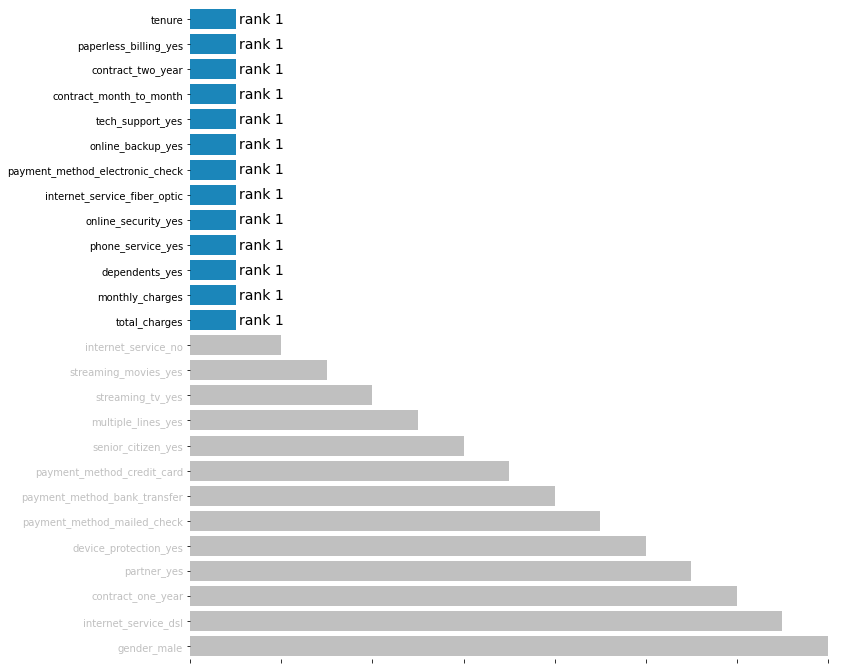

In [322]:
# 可视化
selected_feature = wrapper.get_feature_names_out()
feature_name = wrapper.feature_names_in_
feature_ranking = wrapper.ranking_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_ranking':feature_ranking}).sort_values('feature_ranking', ascending=True)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
feature_selection['selected'] = feature_selection['feature_ranking'].apply(lambda x: True if x == 1 else False)

# highlight the top features
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax, palette=palette)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top features
  np.put(labels, np.arange(threshold,labels_len), [-1])

  # hide the labels for non-top features
  labels = [f'rank {val:.0f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.show()

In [323]:
# 观察
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_wrap, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap)

score_wrap = get_score(y_pred_list, y_test_model, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.778041,0.726886,0.762401,0.738004,0.762401
AdaBoost Classifier,0.755324,0.712432,0.757750,0.721120,0.757750
CatBoost Classifier,0.785140,0.728213,0.747315,0.736082,0.747315
Hist Gradient Boosting,0.776621,0.718710,0.738671,0.726709,0.738671
XGBoost,0.777567,0.717935,0.731917,0.723983,0.731917
LightGBM,0.782300,0.724725,0.743106,0.732325,0.743106


In [324]:
# 嵌入法（embedding）特征选择
# 使用逻辑回归作为其基本估计量
estimator = LogisticRegression(random_state=1)

embedded = SelectFromModel(estimator=estimator, threshold='median')
embedded.fit(X_train_model, y_train_model)

X_train_embed = embedded.transform(X_train_model)
X_test_embed = embedded.transform(X_test_scale)

print('before embedded\t:', X_train_model.shape)
print('after embedded\t:', X_train_embed.shape)

before embedded	: (7244, 26)
after embedded	: (7244, 13)


threshold: 0.300


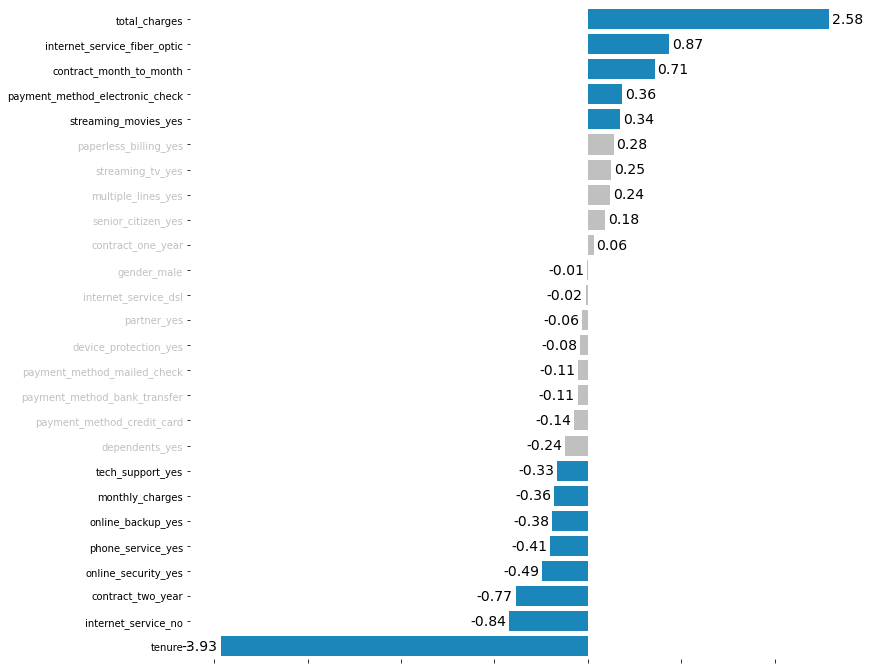

In [325]:
# viz
# selected_feature = embedded.get_feature_names_out()
feature_name = embedded.feature_names_in_
feature_importance = embedded.estimator_.coef_[0]

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_importance':feature_importance}).sort_values('feature_importance', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
threshold = embedded.threshold_
print(f'threshold: {threshold:.3f}')
feature_selection['selected'] = feature_selection['feature_importance'].apply(lambda x: True if (abs(x) > threshold) else False)

# highlight the top features
palette = []
for flag in feature_selection['selected']:
  if flag:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette)
sns.barplot(data=feature_selection, x='feature_importance', y='feature_name', ax=ax, palette=palette)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.show()

In [326]:
# 观察嵌入法的效果
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_embed, y_train_model)
  y_pred_list[name] = model.predict(X_test_embed)

score_embed = get_score(y_pred_list, y_test_model, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.767156,0.716647,0.753284,0.727161,0.753284
AdaBoost Classifier,0.744439,0.703082,0.748064,0.710338,0.748064
CatBoost Classifier,0.773781,0.717290,0.741860,0.726441,0.741860
Hist Gradient Boosting,0.766209,0.709489,0.734998,0.718617,0.734998
XGBoost,0.772362,0.711325,0.723820,0.716789,0.723820
LightGBM,0.777567,0.720410,0.742161,0.728936,0.742161


## 比较模型性能
### 特征选择之前和之后进行模型性能比较，将取每个指标的平均值。

In [327]:
score_smote_mean = pd.DataFrame(score_smote.mean(), columns=['original']).T
score_filter_mean = pd.DataFrame(score_filter.mean(), columns=['filter method']).T
score_wrap_mean = pd.DataFrame(score_wrap.mean(), columns=['wrapper method']).T
score_embed_mean = pd.DataFrame(score_embed.mean(), columns=['embedded method']).T

score_compare = pd.concat([score_smote_mean,
                           score_filter_mean,
                           score_wrap_mean,
                           score_embed_mean], axis=0)

score_compare.style.background_gradient(axis=0)

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
original,0.779303,0.722653,0.736513,0.726636,0.736513
filter method,0.773545,0.719637,0.745967,0.727783,0.745967
wrapper method,0.775832,0.721483,0.746860,0.729704,0.746860
embedded method,0.766919,0.713041,0.740698,0.721380,0.740698


### 从这图中可以看出，没有进行特征选择的原始特征具有最高的准确率，但是recall最低。
### 综合来看，过滤法表现最优。因此下一步超参数调优中，我将只是用原始特征和使用filter方法进行特征选择后的特征。

## 超参数调优

#### 调优策略是侧重于优化 positive recall（不是平均值）来最小化 false negatives的发生，也就是错误地预测真正流失客户不是流失客户（1预测为0）。这是因为获取新客户的成本比留存现有客户的成本更高。但是仍然需要关注准确率（accuracy）分数。

In [328]:
model_list = {
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

In [329]:
# 模型调优
model_list_tuned = {
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1,
                                                              max_depth=2,
                                                              n_estimators=500,
                                                              learning_rate=0.02),
              
    'AdaBoost Classifier':AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1, max_depth=2),
                                             random_state=1,
                                             n_estimators=80,
                                             learning_rate=0.04),
              
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False,
                                             n_estimators=1000,
                                             learning_rate=0.004,
                                             scale_pos_weight=1.1),
              
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1,
                                                            max_iter=200, 
                                                            learning_rate=0.01,
                                                            max_depth=5),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss',
                            colsample_bytree=0.1,
                            learning_rate=0.005),
              
    'LightGBM':LGBMClassifier(random_state=1,
                              num_leaves=10,
                              n_estimators=175,
                              learning_rate=0.01)
}

### 没有特征选择时：

In [330]:
# Before Tuning
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_no_fs_not_tuned = get_score(y_pred_list, y_test_model)

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.787506,0.581871,0.709447,0.639357,0.762585
AdaBoost Classifier,0.754851,0.526576,0.759358,0.621898,0.756290
CatBoost Classifier,0.785613,0.594406,0.606061,0.600177,0.728288
Hist Gradient Boosting,0.780407,0.584348,0.598930,0.591549,0.722468
XGBoost,0.784193,0.593918,0.591800,0.592857,0.722769
LightGBM,0.783247,0.589255,0.606061,0.597540,0.726677


In [331]:
# After Tuning
y_pred_list = dict()

for name, model in model_list_tuned.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_no_fs_tuned = get_score(y_pred_list, y_test_model)

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.783247,0.570645,0.741533,0.644961,0.769929
AdaBoost Classifier,0.761950,0.535891,0.771836,0.632579,0.765106
CatBoost Classifier,0.771888,0.552597,0.739750,0.632622,0.761628
Hist Gradient Boosting,0.763370,0.537794,0.773619,0.634503,0.766642
XGBoost,0.763843,0.540365,0.739750,0.624530,0.756151
LightGBM,0.760057,0.532767,0.782531,0.633935,0.767232


In [332]:
# 比较accuracy
score_compare_accuracy = score_no_fs_not_tuned.loc[:, ['accuracy']]

score_compare_accuracy = score_compare_accuracy.join(score_no_fs_tuned.loc[:, ['accuracy']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_accuracy.style.background_gradient(axis=1)

,accuracy_not_tuned,accuracy_tuned
model,,
Gradient Boosting Classifier,0.787506,0.783247
AdaBoost Classifier,0.754851,0.761950
CatBoost Classifier,0.785613,0.771888
Hist Gradient Boosting,0.780407,0.763370
XGBoost,0.784193,0.763843
LightGBM,0.783247,0.760057


#### 调优后，准确率得分大多下降。

In [333]:
# 比较recall
score_compare_recall = score_no_fs_not_tuned.loc[:, ['recall']]

score_compare_recall = score_compare_recall.join(score_no_fs_tuned.loc[:, ['recall']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_recall.style.background_gradient(axis=1)

,recall_not_tuned,recall_tuned
model,,
Gradient Boosting Classifier,0.709447,0.741533
AdaBoost Classifier,0.759358,0.771836
CatBoost Classifier,0.606061,0.739750
Hist Gradient Boosting,0.598930,0.773619
XGBoost,0.591800,0.739750
LightGBM,0.606061,0.782531


#### 但是，召回分数急剧增加。因此，我将使用调整后的模型进行模型选择。

### 有特征选择时：

In [334]:
# 模型调优前
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_fs_not_tuned = get_score(y_pred_list, y_test_model)

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.772362,0.554496,0.725490,0.628571,0.757397
AdaBoost Classifier,0.755324,0.526570,0.777184,0.627790,0.762303
CatBoost Classifier,0.788452,0.588235,0.677362,0.629660,0.752985
Hist Gradient Boosting,0.772835,0.560538,0.668449,0.609756,0.739508
XGBoost,0.778987,0.577303,0.625668,0.600513,0.730038
LightGBM,0.773308,0.563467,0.648841,0.603148,0.733570


In [335]:
# 模型调优后
y_pred_list = dict()

for name, model in model_list_tuned.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_fs_tuned = get_score(y_pred_list, y_test_model)

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.774728,0.554839,0.766488,0.643713,0.772097
AdaBoost Classifier,0.758637,0.530834,0.782531,0.632565,0.766266
CatBoost Classifier,0.761477,0.535581,0.764706,0.629956,0.762508
Hist Gradient Boosting,0.756271,0.527711,0.780749,0.629763,0.764086
XGBoost,0.761003,0.534230,0.778966,0.633793,0.766738
LightGBM,0.762423,0.535585,0.791444,0.638849,0.771688


In [336]:
# 比较accuracy
score_compare_accuracy = score_fs_not_tuned.loc[:, ['accuracy']]

score_compare_accuracy = score_compare_accuracy.join(score_fs_tuned.loc[:, ['accuracy']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_accuracy.style.background_gradient(axis=1)

,accuracy_not_tuned,accuracy_tuned
model,,
Gradient Boosting Classifier,0.772362,0.774728
AdaBoost Classifier,0.755324,0.758637
CatBoost Classifier,0.788452,0.761477
Hist Gradient Boosting,0.772835,0.756271
XGBoost,0.778987,0.761003
LightGBM,0.773308,0.762423


#### 调优后，准确率得分大多下降。

In [337]:
# 比较recall
score_compare_recall = score_fs_not_tuned.loc[:, ['recall']]

score_compare_recall = score_compare_recall.join(score_fs_tuned.loc[:, ['recall']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_recall.style.background_gradient(axis=1)

,recall_not_tuned,recall_tuned
model,,
Gradient Boosting Classifier,0.725490,0.766488
AdaBoost Classifier,0.777184,0.782531
CatBoost Classifier,0.677362,0.764706
Hist Gradient Boosting,0.668449,0.780749
XGBoost,0.625668,0.778966
LightGBM,0.648841,0.791444


#### 但是，召回分数急剧增加。因此，我将使用调整后的模型进行模型选择。

## 模型选择

#### 一开始，在选择模型的时候有点犹豫，同时在关注回忆分数和准确性分数。但最终决定使用F-beta分数来计算准确性和回忆率的调和平均值。F1分数

### 没有特征选择时：

In [338]:
accuracy = score_no_fs_tuned['accuracy']
recall = score_no_fs_tuned['recall']

score_no_fs_tuned['fbeta'] = fbeta_score(accuracy, recall, beta=1)

score_no_fs_tuned.loc[:, ['accuracy', 'recall', 'fbeta']].style.background_gradient(axis=0)

,accuracy,recall,fbeta
model,,,
Gradient Boosting Classifier,0.783247,0.741533,0.761819
AdaBoost Classifier,0.761950,0.771836,0.766861
CatBoost Classifier,0.771888,0.739750,0.755478
Hist Gradient Boosting,0.763370,0.773619,0.768460
XGBoost,0.763843,0.739750,0.751604
LightGBM,0.760057,0.782531,0.771130


#### 我们可以看到，Gradient Boosting分类器的准确率得分最高，但(几乎)召回率得分最低。相反，LightGBM分类器的准确率最低，但回忆率最高。此外，它的F-beta分数最高。因此，原始特征(没有特征选择)选择的模型是LightGBM。

### 有特征选择时：

In [339]:
accuracy = score_fs_tuned['accuracy']
recall = score_fs_tuned['recall']

score_fs_tuned['fbeta'] = fbeta_score(accuracy, recall, beta=1)

score_fs_tuned.loc[:, ['accuracy', 'recall', 'fbeta']].style.background_gradient(axis=0)

,accuracy,recall,fbeta
model,,,
Gradient Boosting Classifier,0.774728,0.766488,0.770586
AdaBoost Classifier,0.758637,0.782531,0.770399
CatBoost Classifier,0.761477,0.764706,0.763088
Hist Gradient Boosting,0.756271,0.780749,0.768315
XGBoost,0.761003,0.778966,0.769880
LightGBM,0.762423,0.791444,0.776662


#### 我们可以看到，Gradient Boosting分类器的准确率得分最高，但(几乎)召回率得分最低。相反，LightGBM分类器具有中等的准确率，但具有最高的回忆分数。此外，它的F-beta分数最高。因此，选择使用特征选择的模型是LightGBM。
#### 如果我们比较使用所有特征和特征选择的LightGBM分类器，第二个分类器的性能更高。所以，我将有特征选择的light GBM作为我的最终模型。

# 总结

## 最终模型:
### 使用过滤器(filter)方法进行特征选择的 LightGBM

## 建议
### 我们应该更加关注符合以下标准的客户：  
+ Contract：Month-to-month
+ Tenure: Short tenure
+ Internet service: Fiber optic
+ Payment method: Electronic check  

### 是否能给新用户更多好处，因为新客户的流失可能性很大


#  Explainable AI

### 准备数据

In [341]:
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

threshold = 13

filter = SelectKBest(score_func=f_classif, k=threshold)
filter.fit(X_train_model, y_train_model)

X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_model)

# 被选择的特征
selected_feature = filter.get_feature_names_out()
selected_feature

# 为选择的特征创建dataframe
X_train_filter_dict = dict()
X_test_filter_dict = dict()

for i, feature in enumerate(selected_feature):
  X_train_filter_dict[feature] = X_train_filter[:,i]
  X_test_filter_dict[feature] = X_test_filter[:,i]

X_train_filter = pd.DataFrame(X_train_filter_dict)
X_test_filter = pd.DataFrame(X_test_filter_dict)
X_train_filter

,tenure,monthly_charges,total_charges,dependents_yes,internet_service_fiber_optic,internet_service_no,online_security_yes,tech_support_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_electronic_check
0,0.569444,0.017439,0.092386,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.250000,0.810663,0.211433,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.986111,0.482810,0.546783,1.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.013889,0.609865,0.009165,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.666667,0.520678,0.408190,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,0.373289,0.612276,0.250235,0.969201,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
7240,0.013889,0.516384,0.008085,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
7241,0.013889,0.513294,0.008050,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
7242,0.260864,0.668163,0.181239,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### 最终模型

In [343]:
model = LGBMClassifier(random_state=1, num_leaves=10, n_estimators=175, learning_rate=0.01)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.909     0.752     0.823      1552
           1      0.536     0.791     0.639       561

    accuracy                          0.762      2113
   macro avg      0.722     0.772     0.731      2113
weighted avg      0.810     0.762     0.774      2113



### SHAP Explainer
是一种博弈论方法，用于解释任何机器学习模型的输出.

In [344]:
# 输入
input_test = pd.DataFrame(X_test_filter.iloc[1]).T
input_test

,tenure,monthly_charges,total_charges,dependents_yes,internet_service_fiber_optic,internet_service_no,online_security_yes,tech_support_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_electronic_check
1,0.055556,0.684604,0.039316,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [347]:
import shap

explainer = shap.Explainer(model)
shap_values_single = explainer(input_test)

expected_value = explainer.expected_value

print(f'Excpected value: {expected_value}')

Excpected value: [0.04022359148510202, -0.04022359148510202]


In [348]:
shap_values_single

.values =
array([[[-0.23591594,  0.23591594],
        [-0.00413753,  0.00413753],
        [-0.00072695,  0.00072695],
        [ 0.05911169, -0.05911169],
        [-0.29172308,  0.29172308],
        [-0.01305641,  0.01305641],
        [-0.01622603,  0.01622603],
        [ 0.18346012, -0.18346012],
        [-0.56539943,  0.56539943],
        [ 0.02007509, -0.02007509],
        [-0.08983651,  0.08983651],
        [-0.00269196,  0.00269196],
        [ 0.16629843, -0.16629843]]])

.base_values =
array([[ 0.04022359, -0.04022359]])

.data =
array([[0.05555556, 0.68460389, 0.03931582, 1.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [349]:
# 多输入
shap_values_multiple = explainer(X_test_filter)
expected_value = explainer.expected_value

print(f'Excpected value: {expected_value}')

Excpected value: [0.04022359148510202, -0.04022359148510202]


In [350]:
shap_values_multiple[:2]

.values =
array([[[ 0.29423633, -0.29423633],
        [-0.06053281,  0.06053281],
        [ 0.0208216 , -0.0208216 ],
        [-0.00945577,  0.00945577],
        [-0.26767468,  0.26767468],
        [-0.01490526,  0.01490526],
        [-0.05450832,  0.05450832],
        [-0.02310108,  0.02310108],
        [-0.45339447,  0.45339447],
        [ 0.02868916, -0.02868916],
        [-0.10930463,  0.10930463],
        [-0.05183734,  0.05183734],
        [-0.18285116,  0.18285116]],

       [[-0.23591594,  0.23591594],
        [-0.00413753,  0.00413753],
        [-0.00072695,  0.00072695],
        [ 0.05911169, -0.05911169],
        [-0.29172308,  0.29172308],
        [-0.01305641,  0.01305641],
        [-0.01622603,  0.01622603],
        [ 0.18346012, -0.18346012],
        [-0.56539943,  0.56539943],
        [ 0.02007509, -0.02007509],
        [-0.08983651,  0.08983651],
        [-0.00269196,  0.00269196],
        [ 0.16629843, -0.16629843]]])

.base_values =
array([[ 0.04022359, -0.04022359],

In [351]:
shap_values_multiple[:,:,-1][:2]

.values =
array([[-0.29423633,  0.06053281, -0.0208216 ,  0.00945577,  0.26767468,
         0.01490526,  0.05450832,  0.02310108,  0.45339447, -0.02868916,
         0.10930463,  0.05183734,  0.18285116],
       [ 0.23591594,  0.00413753,  0.00072695, -0.05911169,  0.29172308,
         0.01305641,  0.01622603, -0.18346012,  0.56539943, -0.02007509,
         0.08983651,  0.00269196, -0.16629843]])

.base_values =
array([-0.04022359, -0.04022359])

.data =
array([[0.52777778, 0.83906328, 0.46163412, 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 1.        ],
       [0.05555556, 0.68460389, 0.03931582, 1.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

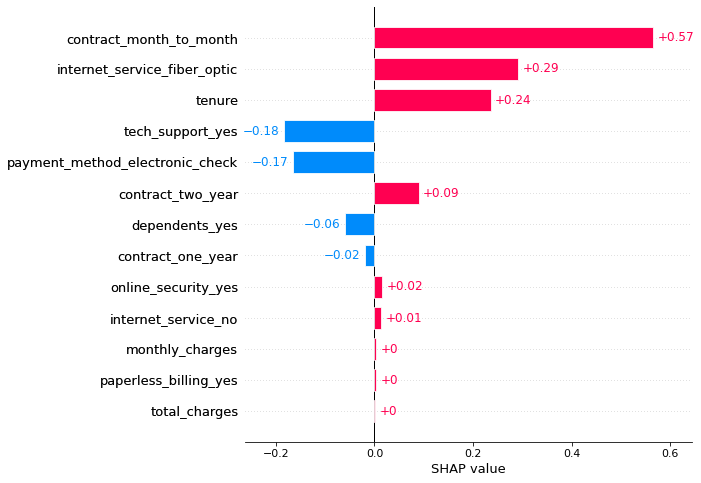

In [352]:
shap.plots.bar(shap_values_single[:,:,-1][0], max_display=20)

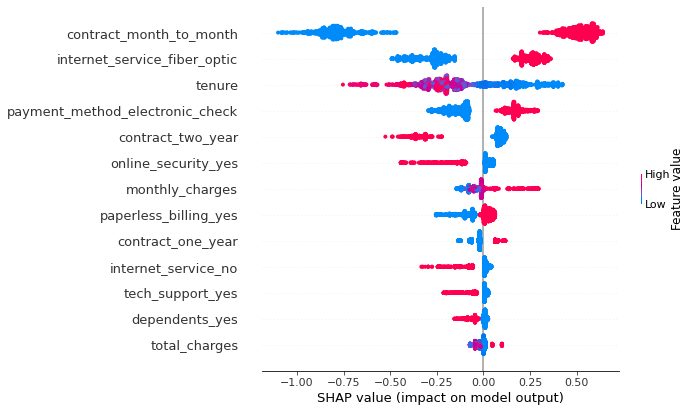

In [354]:
shap.plots.beeswarm(shap_values_multiple[:,:,-1], max_display=20)

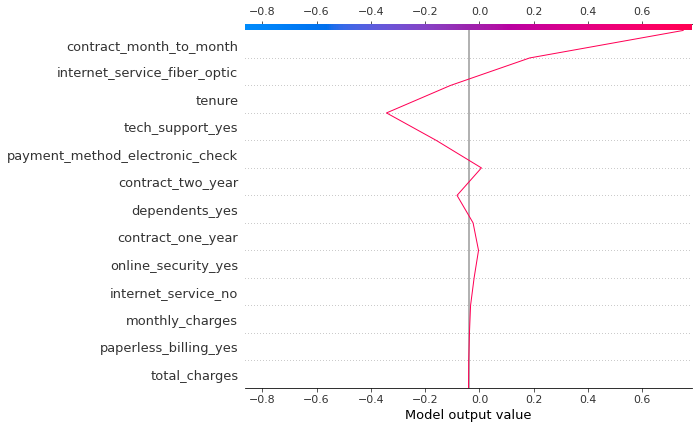

In [355]:
# 单输入
shap.decision_plot(expected_value[-1], shap_values_single[:,:,-1].values, input_test.columns)

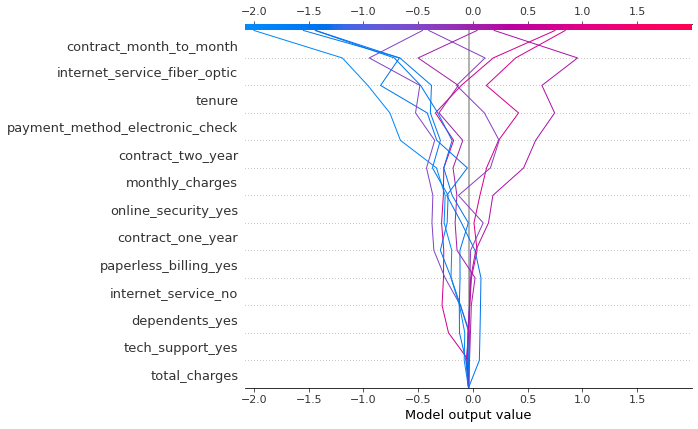

In [356]:
# 多输入
shap.decision_plot(expected_value[-1], shap_values_multiple[:,:,-1].values[:10], X_test_filter.columns)

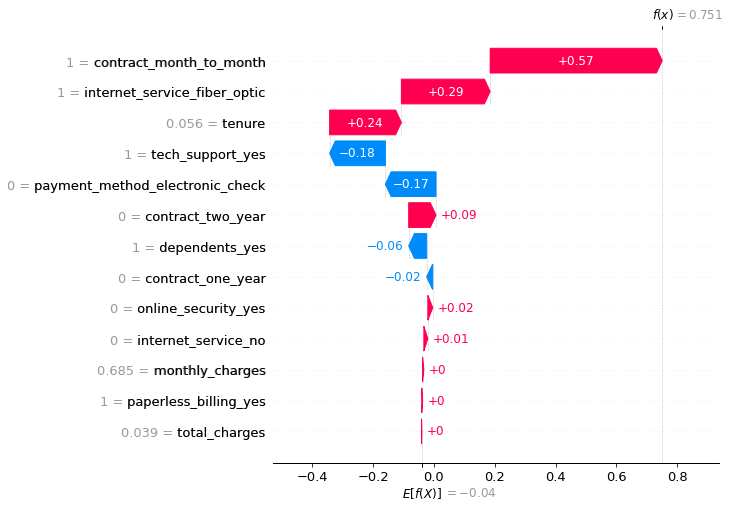

In [357]:

shap.plots.waterfall(shap_values_single[:,:,-1][0], max_display=20)

In [358]:
shap.initjs()

shap.plots.force(expected_value[-1], shap_values_single[:,:,-1].values, input_test.columns)

In [359]:
shap.initjs()

shap.plots.force(expected_value[-1], shap_values_multiple[:,:,-1].values[:100], X_test_filter.columns)